# Assignment 7: Plotting in Python

Before we start, let's generate some example data, load in the world data dataset and import the packages we will need.  **Run the next cell to get started**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load in our data
url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

## Task 1 (1.25 marks)
Plot how the world's average `life_expectancy` changes over the years using the following instructions: 

  a) Use `groupby()` to group `world_data` by `year` and get the global mean `life_expectancy` per year. (0.5 marks)
      - Store the result in `world_life_exp`. 
      - Use `.reset_index()` at the end of the expression to make 
        sure the result is restored as a DataFrame. 
    
  b) Use the `fig, ax = plt.subplots()` notation to plot a `scatter` plot of the average global `life_expectancy` over the years (i.e. year on the x axis, life_expectancy on the y axis) Scatterplots will plot one point/marker for each value in your data. (0.5 marks)
  
  c) Customize the scatter plot and change the marker `color` to green, and the transparency `alpha=0.3`. (0.25 marks)
    

___
**Hint**: You can use `groupby` on a dataframe to group values based on the grouping(s) of columns of your choice. You can then aggregate calculations over values in the dataframe based on those groupings. For example:

For example:

`world_data.groupby('region')['population'].sum().reset_index()`

- `world_data.groupby('region')` groups `world_data` by the `region` column (i.e. 'Asia', 'Europe', 'Africa', 'Americas', 'Oceania')
- the `['population'].sum()` portion uses the groupby object to calculates the `sum` of the `"population"` column for each of the grouped `"region"`. You can repeat this for any column(s) of your choosing, it doesn't have to be the `population`.
- `.reset_index()` makes sure the results are output as a DataFrame again

**Hint**: The object-oriented plotting interface for `matplotlib` provides further access to modifying plot features. We first create "figure" and "axes" objects by calling `plt.subplots()`. Then we can use those objects to add our actual data/visualizations to them.

For example:

```
# some toy data
x = np.arange(0,5,1)
y = x * 2
z = x * 3

# stores the figure and axes in fig, ax, then plots our values into the ax object
fig, ax = plt.subplots()
ax.plot(x, y, color='red') # plot connected by lines
ax.scatter(x, z, color='blue') # scatter plot with values shown as points
```
You can try copying the code above and running it in a code cell to see what it looks like. Try to guess before you plot it.

Alternatively, if you are plotting from a dataframe, you need to indicate which columns from the data to use as the 'x' and 'y' axes and specify the source of the `data`:

```
world_pop = world_data.groupby('year')['population'].sum().reset_index()

fig, ax = plt.subplots()
ax.scatter(x='year', y='population', data=world_pop, color='purple')
```

**Further information**: To see what things you can customize in your `scatter` plot, type `?plt.scatter` or `?ax.scatter` into a code cell. It's a lot to read, but you can skim through to find more info on the parameter you're interested in.

___
Write your code below, only one plot (with all the requirements from the question above) is required. 

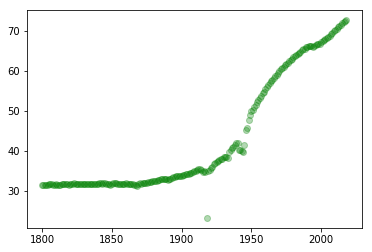

In [4]:
world_life_exp = world_data.groupby('year')['life_expectancy'].mean().reset_index()
fig, ax = plt.subplots()
ax.scatter(x='year', y='life_expectancy', data=world_life_exp, color='green', alpha=0.3)

## Task 2 (0.5 marks)

a. Plot the same data from `Task 1` using seaborn instead of matplotlib. Seaborn has a `scatterplot` function. (0.5 marks)

___
**Hint** Have you imported seaborn?

**Hint** Have you specified `x`, `y`, and the `data` where the x and y you specified can be found? 

**Hint** Most of the parameter names for setting the aesthetics of a plot used in matplotlib can also be used in seaborn, but you can also look through the documentation for that function `?plotting_function_here` to see more. 
___

Write your code below.

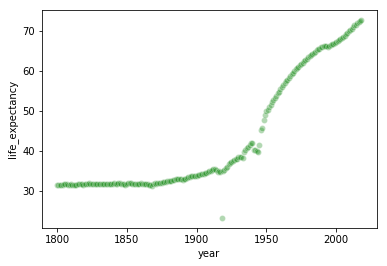

In [5]:
import seaborn as sns
sns.scatterplot("year", "life_expectancy", data=world_life_exp, color='green', alpha=0.3)

## Task 3 (1 mark)

`seaborn` facilitates the visualization of common statistical aggregations (mean, min, max, sum etc).
For example, when using `lineplot` in `seaborn`, the default is to aggregate and average all observations with the same value on the x-axis, and to create a shaded region representing the 95% confidence interval for these observations. It is actually using `groupby` on the dataframe you pass it under the hood, so that you don't have to!
___

Plot the change in `life_expectancy` across `year` using seaborn's `lineplot` function using `world_data` (do not use our summarized data in `world_life_exp`) using the following specifications:

a) Use `ci='sd'` in `lineplot` such that the variability around the values is shown instead of the 95% confidence interval (0.25 marks)

b) Store the correct `lineplot` in a variable named `ax` (0.25 marks)

c) Use the `set_title` method of `ax` to set the title to `Global life expectancy since the 1800s`. Use `fontsize=16`  (0.25 marks)

d) Use the methods `set_xlabel` and `set_ylabel` of the `ax` object to change BOTH the labels from "year" to "Year", and "life_expectancy" to "Life Expectancy", respectively. Use `fontsize=12` for BOTH (0.25 marks). 


___
**Hint** The returned object from calling a `seaborn` plotting function is a `matplotlib` axes,
so all configuration available through `matplotlib` can be applied to the returned object by first assigning it to a variable name (`ax` by convention). 

For example, from lecture:
```
ax = sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)
ax.set_title('World population since the 1800s', fontsize=16)
ax.set_xlabel('Year', fontsize=12)

# to change the appearance (scale) of the y axis labels 
ax.set_yticklabels(ax.get_yticks()/1000000000);
ax.set(ylabel='Population (Billion)');
```
___

Text(0, 0.5, 'Life Expectancy')

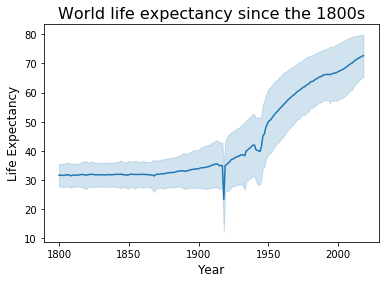

In [45]:
ax = sns.lineplot("year", "life_expectancy", data=world_data, ci='sd')
ax.set_title('World life expectancy since the 1800s', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Life Expectancy', fontsize=12)


## Task 4 (0.5 marks)

Plot the change in `life_expectancy` across `year` again using all the same specifications from `Task 3`, but this time, we also want to the subset the data such that we plot one differently colored and styled line per `income_group` . Follow the instructions below to further customize our plot:

a) Subset the plot by `income_group` by setting the `hue` and `style` arguments in `lineplot`. (0.25 marks)

b) Remove any shading around the lines `ci=None` to clean up our plot as we are more interested in the differences in income groups than the variation across the globe. (0.25 marks)

Text(0, 0.5, 'Life Expectancy')

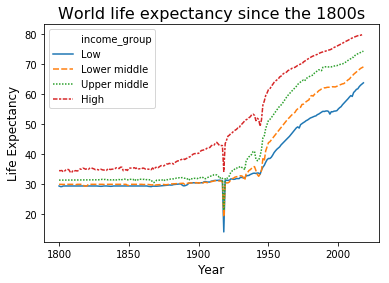

In [85]:
ax = sns.lineplot("year", "life_expectancy", hue='income_group', style='income_group', 
                  data=world_data, ci=None)
ax.set_title('World life expectancy since the 1800s', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Life Expectancy', fontsize=12)


## Task 5 (1.25 marks)


Visualizing categorical variables in this manner is a key step in exploratory data analysis,
and thus `seaborn` has a dedicated plot function for this,
called `relplot()`
(for "relational plot" since it visualizes the relationships between numerical variables).
The syntax to `relplot()` is very similar to `lineplot()`,
but we need to specify that the kind of plot we want is a line plot.
___



a) Use `relplot()` to visualize whether there is a relationship between the **minimum** `life_expectancy` across time and `income_group` for each `region` of the world using the `world_data` dataset.  Each of these `region` subplots should plot **different lines** for each `income_group`. (0.5 marks)

b) Set `ci=None` to remove the confidence intervals. (0.25 marks)

c) Set `col_wrap=3` to wrap the subplots onto the next line when more than 3 plots are plotted. (0.25 marks)

d) Set the x/y labels using the `set_axis_labels()` method which takes an `x_var` label string and `y_var` label string (0.25 marks)

___
**Hint** Often it can be helpful to see how someone else generated a similar plot, to figure out how to build the plot you want. 

Look at this code from the lecture (you can run it to see what it looks like) and use it to help you figure out how to plot your visualization. 
```
ax = sns.relplot(x='year', y='population', data=world_data, estimator='sum',
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3)
```

This plot looks at whether there is a relationship between the sum of population sizes across time and income grouping for different regions in the world.  

We need to specify `kind='line'` because the default `relplot` style is `scatter`. 
___

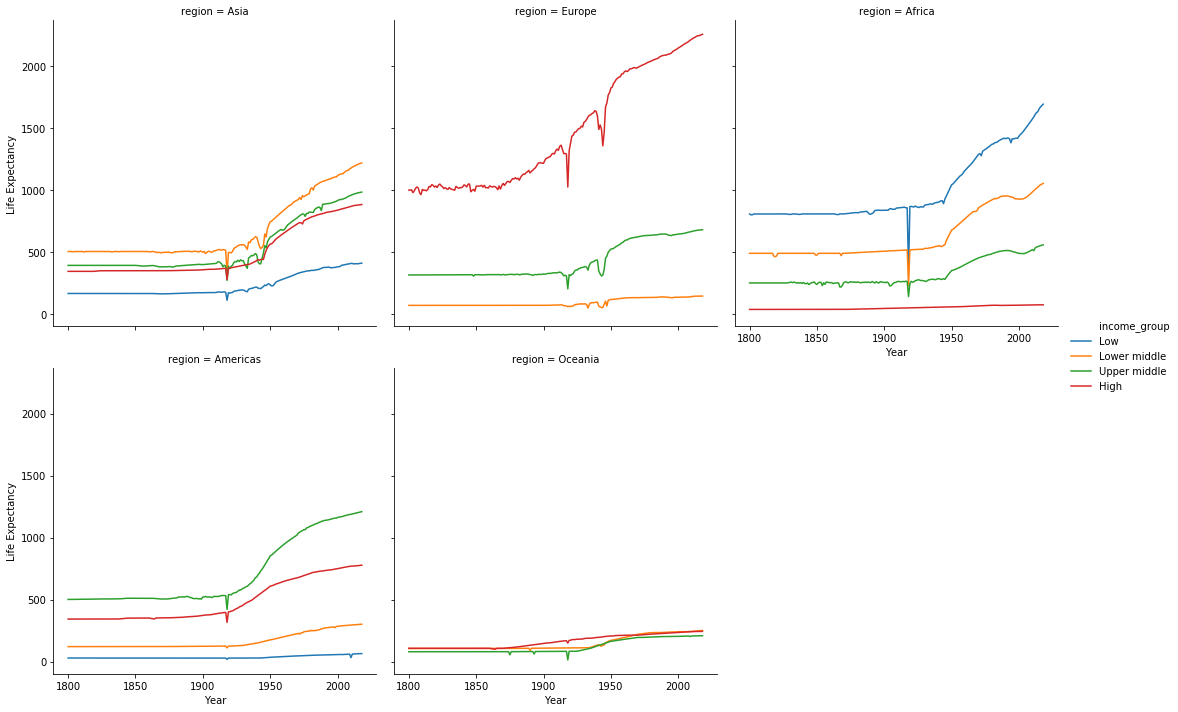

In [114]:
ax = sns.relplot(x='year', y='life_expectancy', data=world_data, estimator='sum',
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3)

ax.set_axis_labels(x_var='Year', y_var='Life Expectancy')

## Task 6 (1.5 marks)

Replicate this plot, and use the `savefig` method to save the file as `last_first_plot.png` where `last` is your last name and `first` is your first name. This should be submitted along with your assignment files. 

![alt](https://raw.githubusercontent.com/BME1478H/Winter2020class/master/Figures/assignment7fig.png)

Mark breakdown:

1. Correct type of plot and data used for x/y axes (0.5 mark)
2. Facetted by correct column, and subset (within each plot) by correct column (0.5 marks)
2. Column wrapping maintained (max 3 per column) (0.25 marks)
3. Renamed columns (0.25 marks)

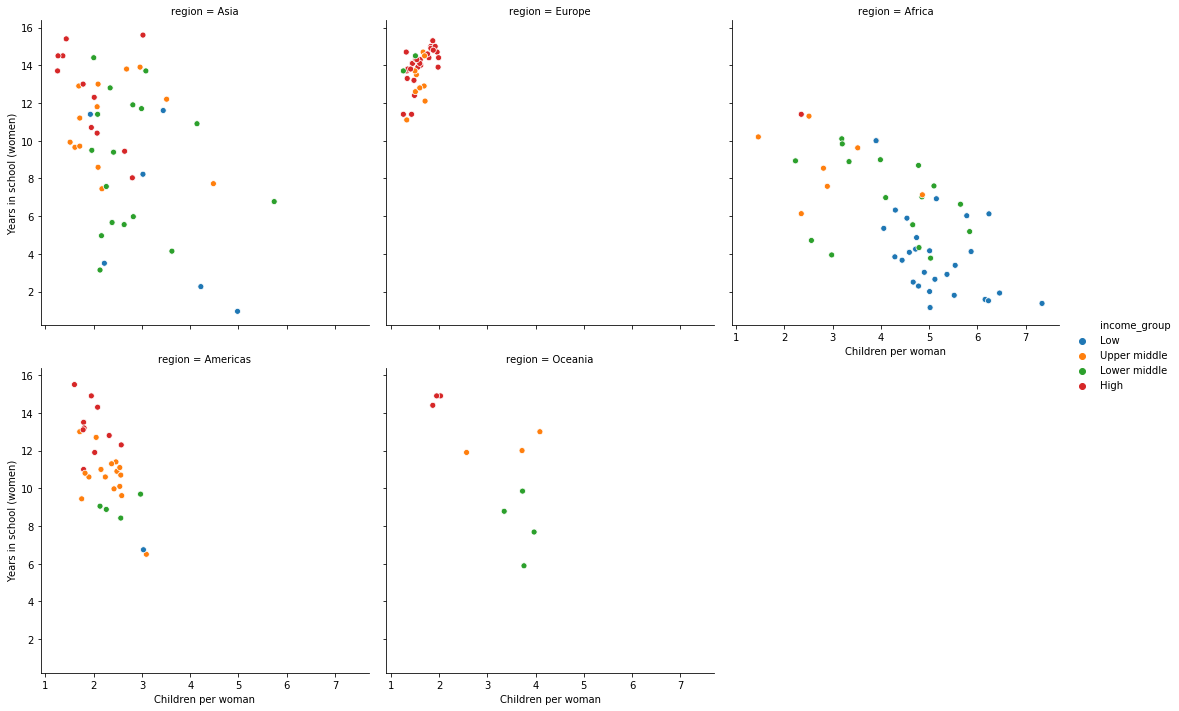

In [111]:
g = sns.relplot(y='years_in_school_women', x='children_per_woman', hue='income_group',
            data=world_data_2014, col='region', col_wrap=3)

g.set_axis_labels(x_var="Children per woman", y_var='Years in school (women)')
g.savefig("last_first_plot.png")